In [ ]:
import pandas as pd

df = pd.read_csv('dataExcel.csv')
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age Result  
0                       0.627   50    Yes  
1                      

In [ ]:
df['Result'] = df['Result'].replace(['No', 'Yes'], [0, 1])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
columns_to_impute = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

for column in columns_to_impute:
    mean_value = df[column].mean()
    df[column] = df[column].replace(0, mean_value)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.fit_transform(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result
0,0.312500,0.670968,0.489796,0.304348,0.079086,0.314928,0.234415,0.483333,1
1,0.000000,0.264516,0.428571,0.239130,0.079086,0.171779,0.116567,0.166667,0
2,0.437500,0.896774,0.408163,0.147135,0.079086,0.104294,0.253629,0.183333,1
3,0.000000,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.177816,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.562500,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0
764,0.062500,0.503226,0.469388,0.217391,0.079086,0.380368,0.111870,0.100000,0
765,0.250000,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0
766,0.000000,0.529032,0.367347,0.147135,0.079086,0.243354,0.115713,0.433333,1


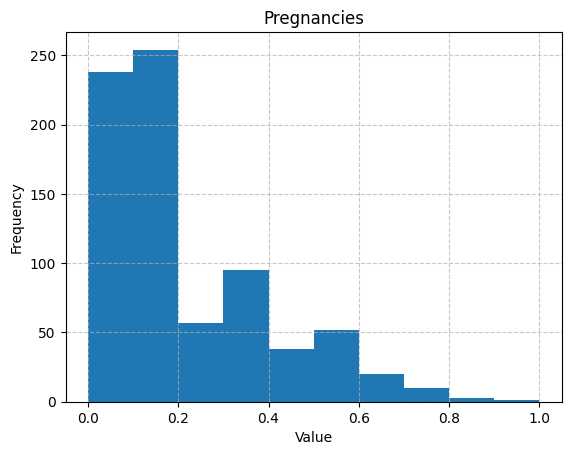

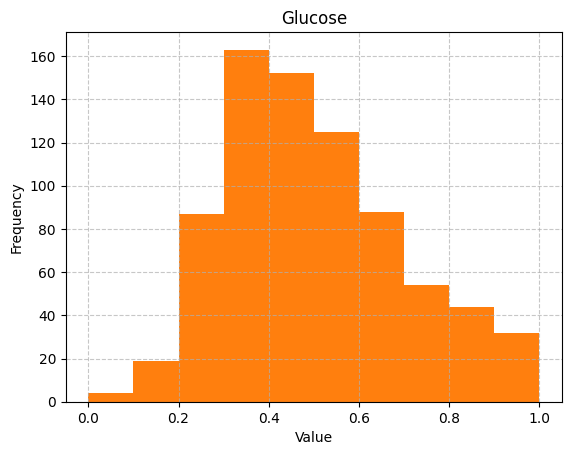

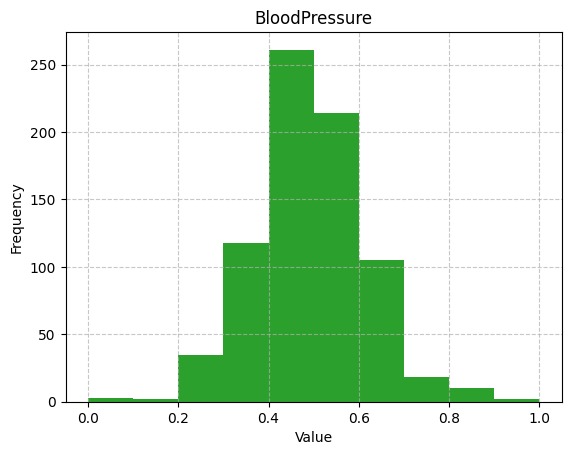

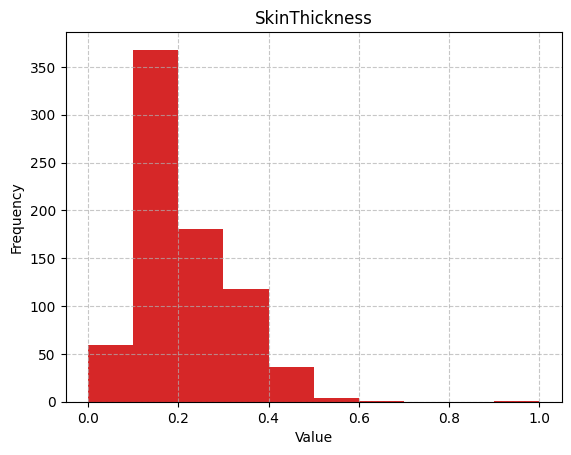

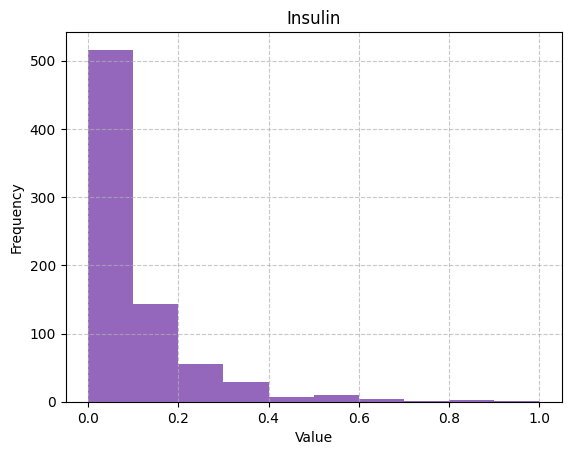

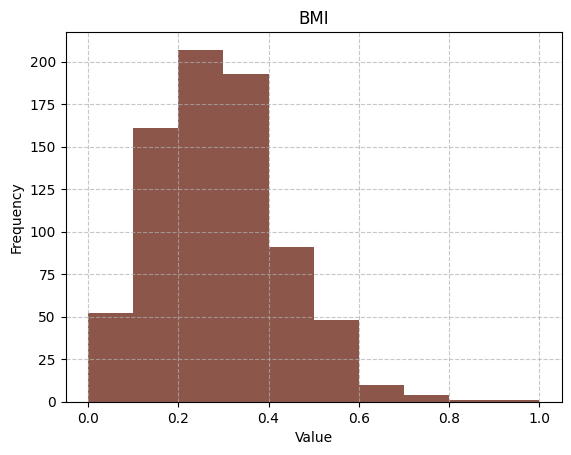

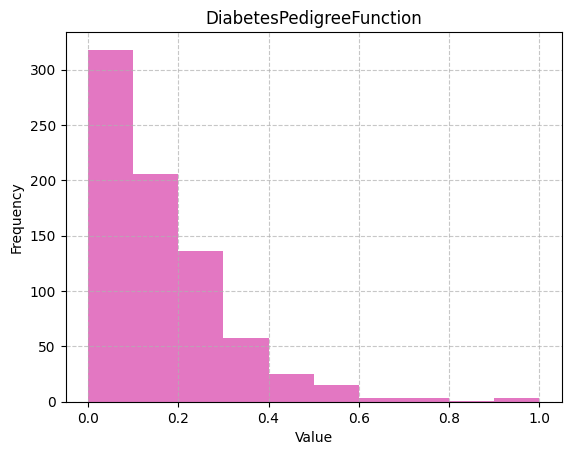

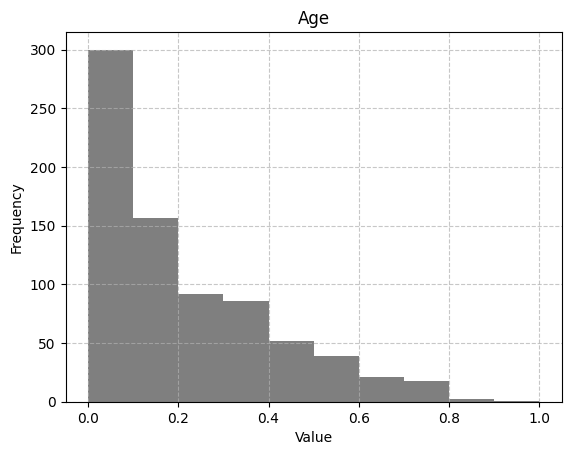

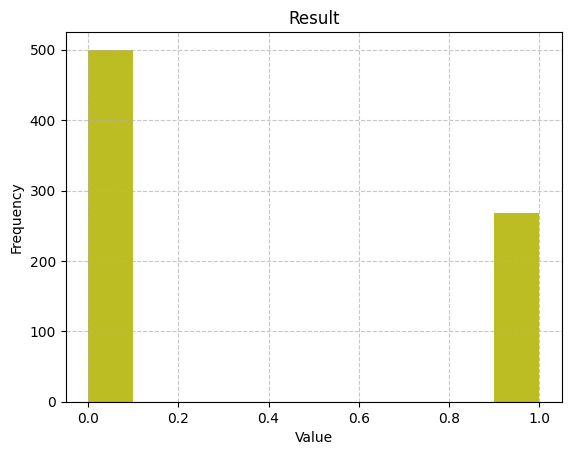

In [ ]:
import matplotlib.pyplot as plt

custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i, column in enumerate(df.columns):
    plt.hist(df[column], bins=10, color=custom_colors[i])
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


In [ ]:
import numpy as np

selected_columns = ["BMI", "DiabetesPedigreeFunction", "SkinThickness"]

for col in selected_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    df[col] = np.where((df[col] > upper_limit), df[col].mean(), df[col])


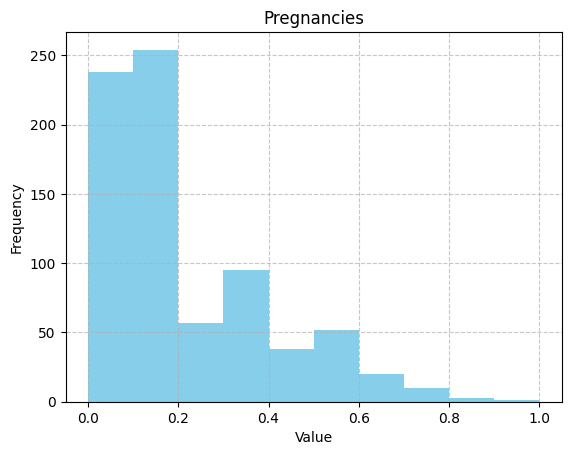

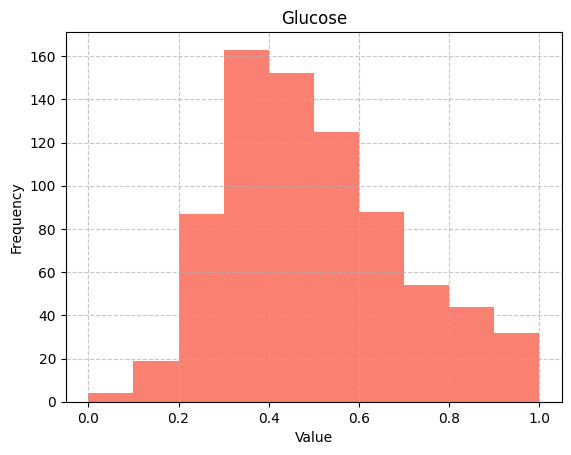

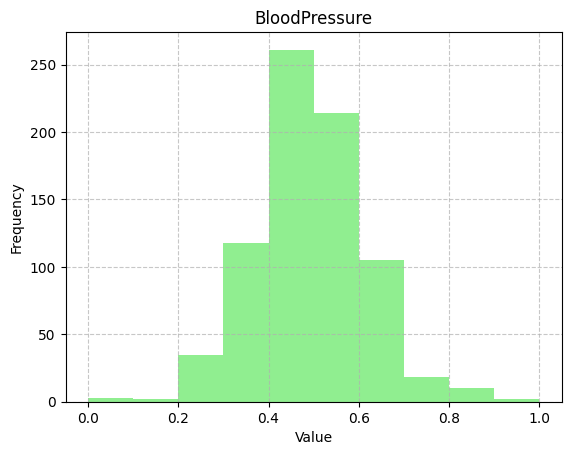

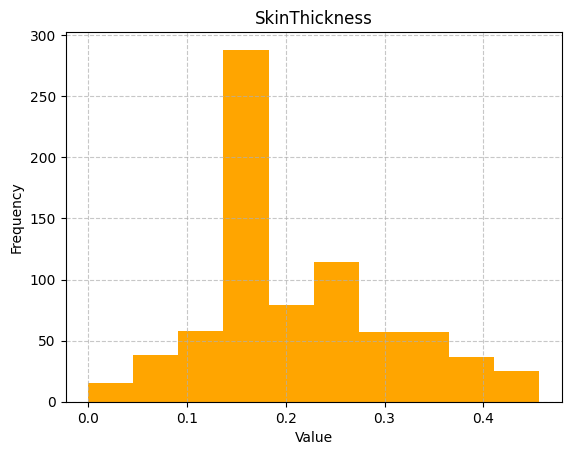

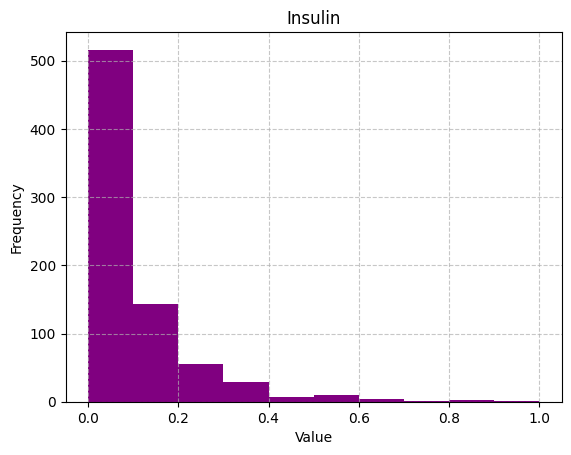

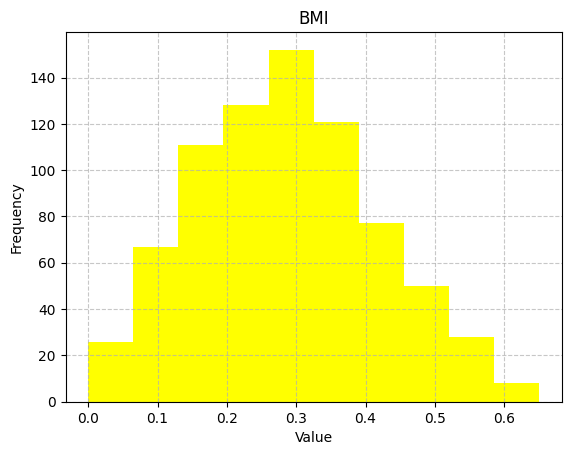

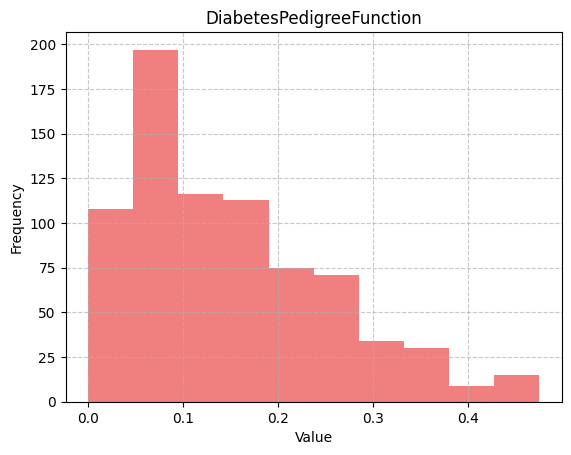

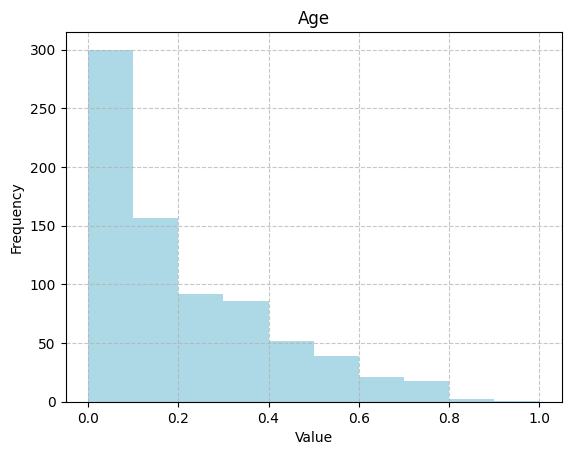

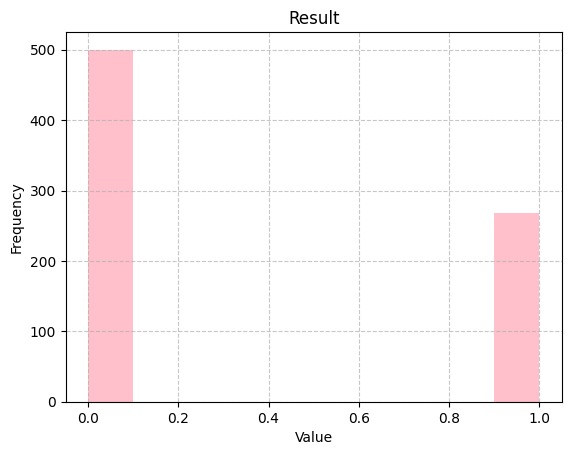

In [ ]:
import matplotlib.pyplot as plt

colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'yellow', 'lightcoral', 'lightblue', 'pink', 'lightgray']

for i, column in enumerate(df.columns):
    plt.hist(df[column], bins=10, color=colors[i])
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


Accuracy: 0.7316017316017316
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       151
           1       0.60      0.65      0.63        80

    accuracy                           0.73       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.73      0.73       231



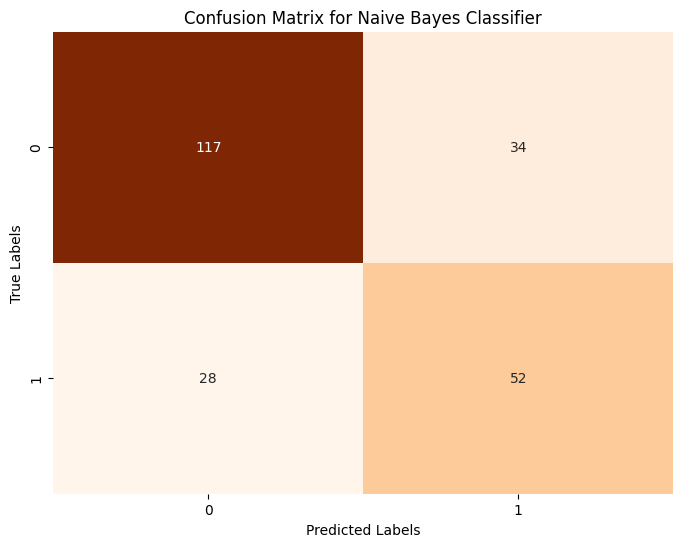

Sensitivity (Recall): 0.65
Specificity: 0.7748344370860927
Accuracy: 0.7316017316017316
F1-score: 0.6265060240963854


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Veri setini %70 eğitim ve %30 test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(df.drop('Result', axis=1), df['Result'], test_size=0.3, random_state=42)

# Naive Bayes sınıflandırıcısını eğitim veri seti üzerinde uygulama
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yapma
y_pred = gnb.predict(X_test)

# Sonuçları raporlama
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix'i görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()

# Metrik hesaplama
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = accuracy_score(y_test, y_pred)
f1 = 2 * (sensitivity * (tp / (tp + fp))) / (sensitivity + (tp / (tp + fp)))

print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy)
print("F1-score:", f1)


Best k: 9
Accuracy: 0.7316017316017316
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       151
           1       0.62      0.57      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.73      0.73      0.73       231



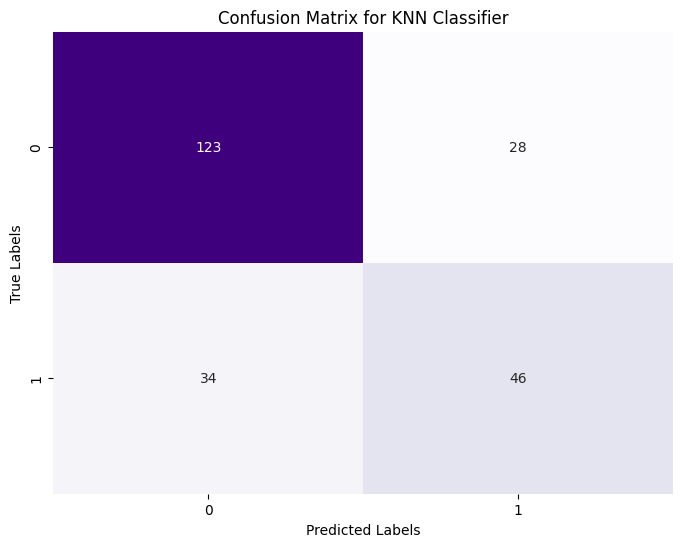

Sensitivity (Recall): 0.575
Specificity: 0.8145695364238411
Accuracy: 0.7316017316017316
F1-score: 0.5974025974025973


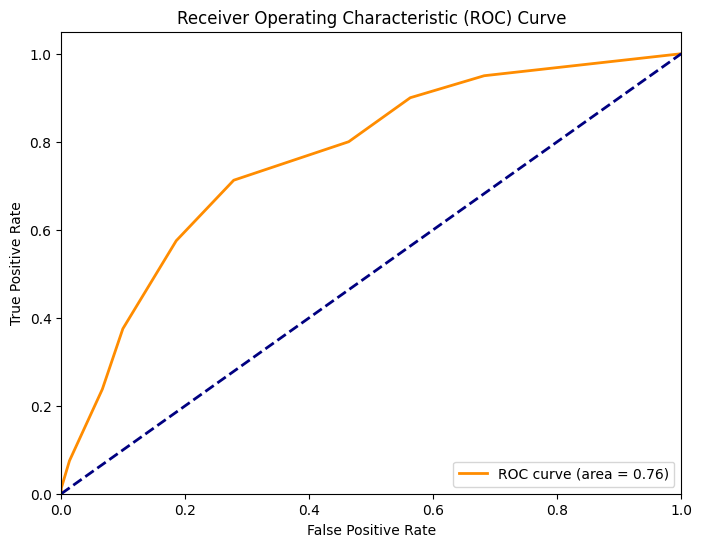

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Veri setini %70 eğitim ve %30 test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(df.drop('Result', axis=1), df['Result'], test_size=0.3, random_state=42)

# En iyi k değerini belirlemek için bir döngü kullanma
best_accuracy = 0
best_k = 0
for k in range(1, 11):
    # K-en yakın komşuluk sınıflandırıcısını oluşturma
    knn = KNeighborsClassifier(n_neighbors=k)
    # Eğitim verileriyle modeli eğitme
    knn.fit(X_train, y_train)
    # Test verileriyle tahmin yapma
    y_pred = knn.predict(X_test)
    # Doğruluk oranını hesaplama
    accuracy = accuracy_score(y_test, y_pred)
    # En iyi doğruluk oranını ve k değerini güncelleme
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

# En iyi k değeriyle K-en yakın komşuluk sınıflandırıcısını oluşturma
knn = KNeighborsClassifier(n_neighbors=best_k)
# Eğitim verileriyle modeli eğitme
knn.fit(X_train, y_train)
# Test verileriyle tahmin yapma
y_pred = knn.predict(X_test)

# Sonuçları raporlama
print("Best k:", best_k)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix'i görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for KNN Classifier")
plt.show()

# Metrik hesaplama
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = accuracy_score(y_test, y_pred)
f1 = 2 * (sensitivity * (tp / (tp + fp))) / (sensitivity + (tp / (tp + fp)))

print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy)
print("F1-score:", f1)

# ROC curve çizimi
y_pred_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


MLP Classifier
Accuracy: 0.7575757575757576
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.66      0.61      0.64        80

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.76      0.76       231



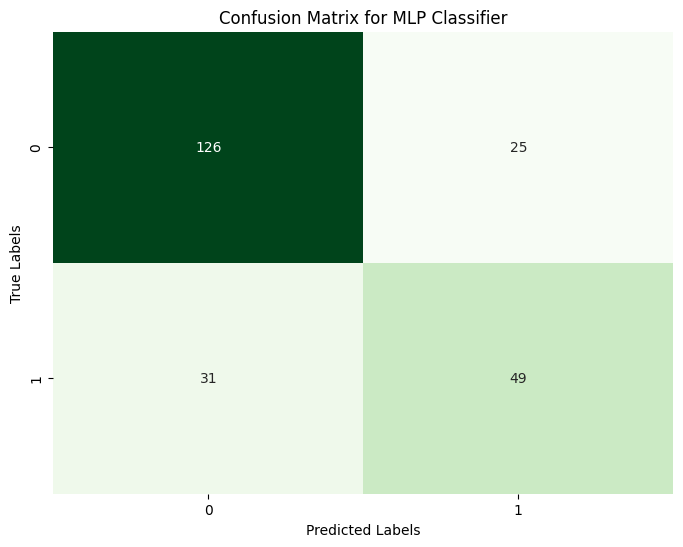

Sensitivity (Recall): 0.6125
Specificity: 0.8344370860927153
Accuracy: 0.7575757575757576
F1-score: 0.6363636363636365
SVM Classifier
Accuracy: 0.7402597402597403
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       151
           1       0.65      0.55      0.59        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



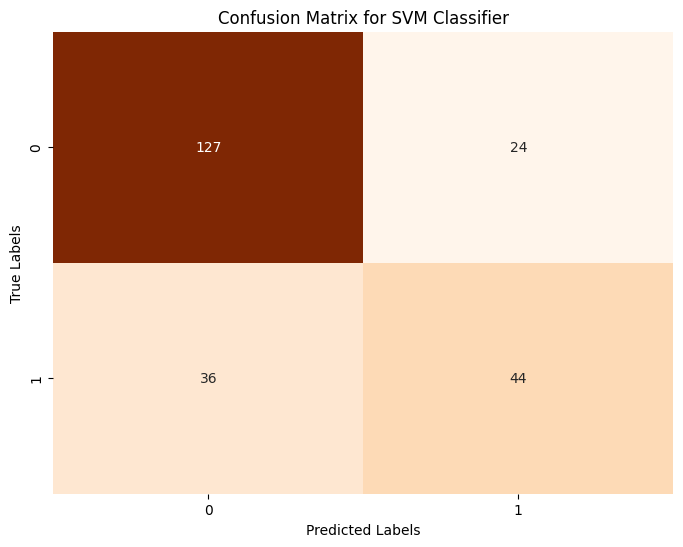

Sensitivity (Recall): 0.55
Specificity: 0.8410596026490066
Accuracy: 0.7402597402597403
F1-score: 0.5945945945945946


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Veri setini %70 eğitim ve %30 test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(df.drop('Result', axis=1), df['Result'], test_size=0.3, random_state=42)

# MLP sınıflandırıcısını eğitim veri seti üzerinde uygulama
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yapma
y_pred_mlp = mlp.predict(X_test)

# Sonuçları raporlama
print("MLP Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# MLP Confusion Matrix'i görselleştirme
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for MLP Classifier")
plt.show()

# Metrik hesaplama
tn, fp, fn, tp = cm_mlp.ravel()
sensitivity_mlp = tp / (tp + fn)
specificity_mlp = tn / (tn + fp)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
f1_mlp = 2 * (sensitivity_mlp * (tp / (tp + fp))) / (sensitivity_mlp + (tp / (tp + fp)))

print("Sensitivity (Recall):", sensitivity_mlp)
print("Specificity:", specificity_mlp)
print("Accuracy:", accuracy_mlp)
print("F1-score:", f1_mlp)

# SVM sınıflandırıcısını eğitim veri seti üzerinde uygulama
svm = SVC()
svm.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yapma
y_pred_svm = svm.predict(X_test)

# Sonuçları raporlama
print("SVM Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

# SVM Confusion Matrix'i görselleştirme
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for SVM Classifier")
plt.show()

# Metrik hesaplama
tn, fp, fn, tp = cm_svm.ravel()
sensitivity_svm = tp / (tp + fn)
specificity_svm = tn / (tn + fp)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = 2 * (sensitivity_svm * (tp / (tp + fp))) / (sensitivity_svm + (tp / (tp + fp)))

print("Sensitivity (Recall):", sensitivity_svm)
print("Specificity:", specificity_svm)
print("Accuracy:", accuracy_svm)
print("F1-score:", f1_svm)


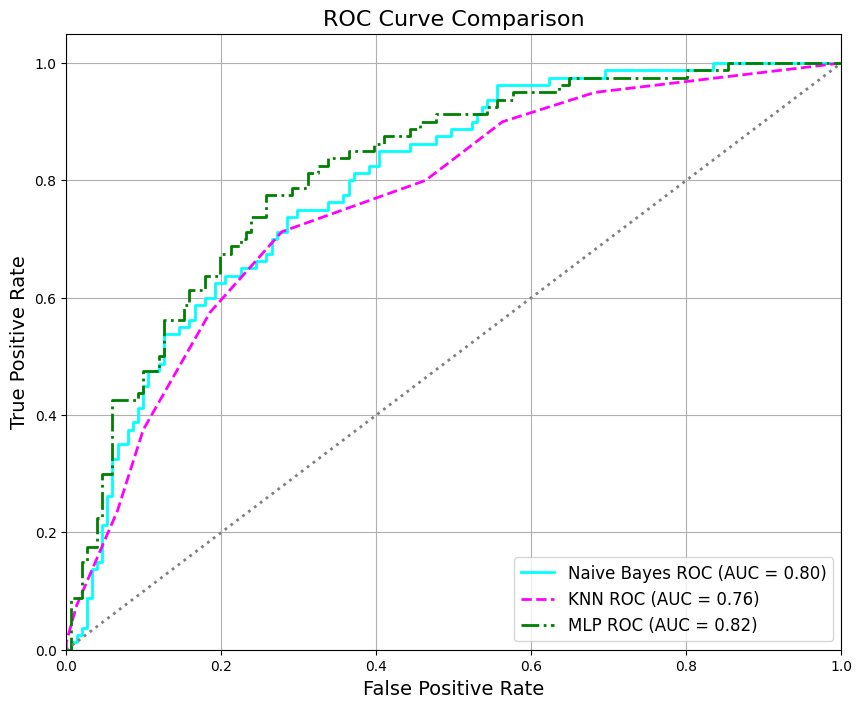

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Naive Bayes için ROC eğrisi ve AUC hesapla
probs_nb = gnb.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, probs_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# KNN için ROC eğrisi ve AUC hesapla
probs_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, probs_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# MLP için ROC eğrisi ve AUC hesapla
probs_mlp = mlp.predict_proba(X_test)[:, 1]
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, probs_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# ROC eğrilerini çiz
plt.figure(figsize=(10, 8))
plt.plot(fpr_nb, tpr_nb, color='cyan', linestyle='-', linewidth=2,
         label='Naive Bayes ROC (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_knn, tpr_knn, color='magenta', linestyle='--', linewidth=2,
         label='KNN ROC (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_mlp, tpr_mlp, color='green', linestyle='-.', linewidth=2,
         label='MLP ROC (AUC = %0.2f)' % roc_auc_mlp)

# Rastgele tahmin ROC eğrisi
plt.plot([0, 1], [0, 1], color='grey', linestyle=':', linewidth=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve Comparison', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()


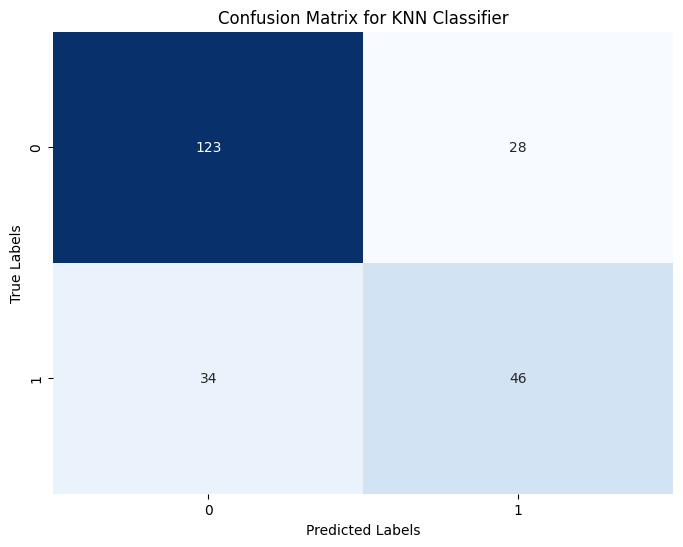

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       151
           1       0.62      0.57      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.73      0.73      0.73       231



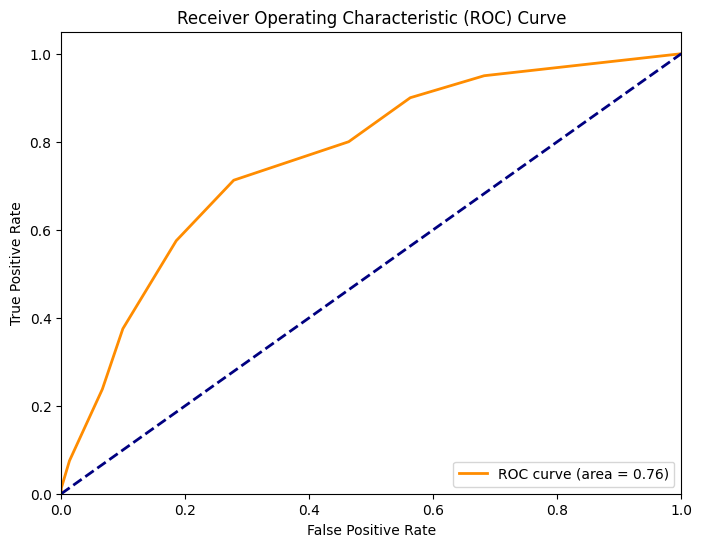

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Konfüzyon matrisi
cm = confusion_matrix(y_test, y_pred)

# Konfüzyon matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for KNN Classifier")
plt.show()

# Diğer metrikler
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC eğrisi ve AUC
y_pred_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# ROC eğrisini görselleştirme
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
